# 2차원 데이터의 정리

## 두 데이터 사이의 관계를 나타내는 지표

In [5]:
import numpy as np
import pandas as pd

%precision 3
pd.set_option('display.precision', 3)

In [6]:
df = pd.read_csv('./data/ch2_scores_em.csv',
                 index_col='student number')

In [10]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame(
    {
        'english': en_scores,
        'math': ma_scores
    }, 
    index=pd.Index(list('ABCDEFGHIJ'), name='student')
)

scores_df

,english,math
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


### 공분산(共分散)

In [15]:
summary_df = scores_df.copy()
summary_df['eng dev'] = summary_df['english'] - summary_df['english'].mean()
summary_df['math dev'] = summary_df['math'] - summary_df['math'].mean()
summary_df['prod of dev'] = summary_df['eng dev'] * summary_df['math dev']
summary_df

,english,math,eng dev,math dev,prod of dev
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [20]:
# 공분산 Covariance
summary_df['prod of dev'].mean()

62.800

In [34]:
# 공분산 행렬
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
# 공분산
cov_mat[1, 0], cov_mat[0, 1]

(62.800, 62.800)

In [36]:
# 영어분산,    수학분산
cov_mat[0, 0], cov_mat[1, 1]

(86.000, 68.440)

In [37]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.000, 68.440)

In [39]:
# summary_df.cov()

### 상관계수

In [41]:
# 공분산 / 영어표준편차 * 수학표준편차
np.cov(en_scores, ma_scores, ddof=0)[0, 1] / (np.std(en_scores) * np.std(ma_scores))

0.819

In [44]:
np.corrcoef(en_scores, ma_scores)[0, 1]

0.819

In [46]:
scores_df.corr()

,english,math
english,1.000,0.819
math,0.819,1.000


## 2차원 데이터의 시각화

### 산점도

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

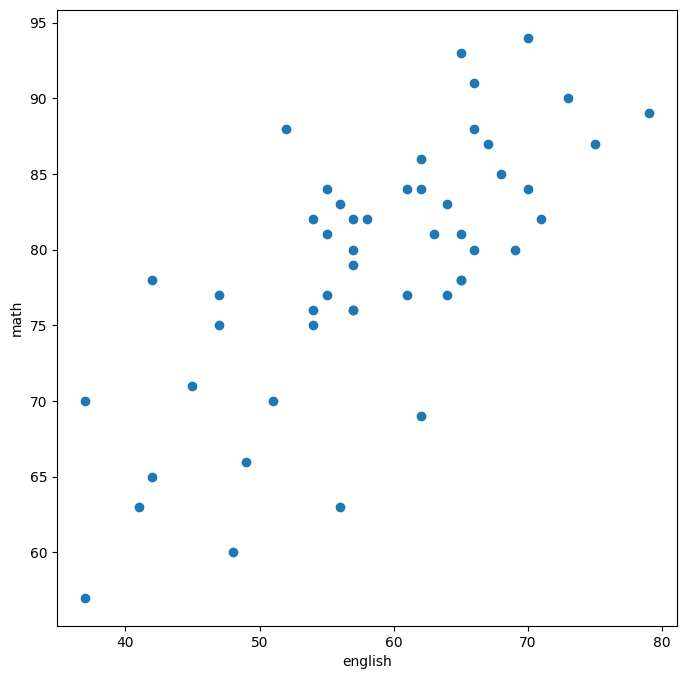

In [52]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
# 산점도
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('math')

plt.show()

### 회귀직선

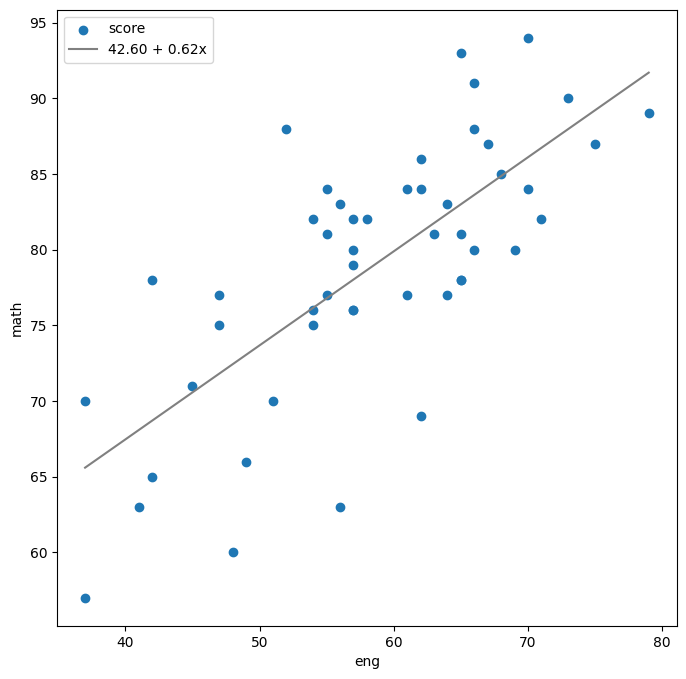

In [72]:
# 계수β_0와β_1를 구한다
poly_fit = np.polyfit(english_scores, math_scores, 1)

# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)

# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(english_scores.min(), english_scores.max())

# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x')
ax.set_xlabel('eng')
ax.set_ylabel('math')

# 범례의 표시
ax.legend(loc='upper left')

plt.show()


### 히트맵

## 앤스컴의 예

In [ ]:
# 그래프를 그리기 위한 영역을 2x2개 생성

    # 그리는 영역을 선택

    # 타이틀을 부여


# 그래프 사이의 간격을 좁힘
